In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow

In [2]:
#installing the kaggle library
!pip install kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dataset from kaggle

In [4]:
!kaggle competitions download -c dogs-vs-cats

 99% 805M/812M [00:08<00:00, 136MB/s]
100% 812M/812M [00:08<00:00, 94.8MB/s]


In [5]:
ls

dogs-vs-cats.zip  kaggle.json  sample_data/


Extracting the compressed file

In [6]:
from zipfile import ZipFile
dataset='dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
from zipfile import ZipFile
dataset='train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print(file_count)

25000


In [9]:
file_name=os.listdir('/content/train')
print(file_name)

['dog.2882.jpg', 'cat.9416.jpg', 'dog.8713.jpg', 'dog.6379.jpg', 'dog.11096.jpg', 'dog.6496.jpg', 'cat.10153.jpg', 'dog.8016.jpg', 'dog.2826.jpg', 'dog.5780.jpg', 'cat.2413.jpg', 'dog.8196.jpg', 'cat.2731.jpg', 'cat.4761.jpg', 'cat.12149.jpg', 'cat.1456.jpg', 'dog.12047.jpg', 'dog.6896.jpg', 'dog.6645.jpg', 'dog.1102.jpg', 'cat.11150.jpg', 'cat.6219.jpg', 'dog.342.jpg', 'cat.2079.jpg', 'dog.7083.jpg', 'cat.8061.jpg', 'cat.10514.jpg', 'cat.4770.jpg', 'dog.2647.jpg', 'cat.5002.jpg', 'cat.8127.jpg', 'dog.7971.jpg', 'cat.9010.jpg', 'cat.9788.jpg', 'dog.476.jpg', 'cat.7843.jpg', 'dog.9687.jpg', 'cat.6330.jpg', 'cat.3111.jpg', 'dog.10551.jpg', 'dog.135.jpg', 'dog.206.jpg', 'cat.6384.jpg', 'cat.4834.jpg', 'cat.167.jpg', 'dog.1035.jpg', 'dog.6908.jpg', 'dog.5623.jpg', 'dog.6349.jpg', 'dog.9786.jpg', 'cat.9940.jpg', 'cat.7744.jpg', 'dog.5750.jpg', 'cat.6269.jpg', 'dog.7038.jpg', 'dog.4400.jpg', 'dog.8702.jpg', 'cat.3638.jpg', 'cat.4162.jpg', 'dog.10836.jpg', 'dog.461.jpg', 'dog.2904.jpg', 'dog.

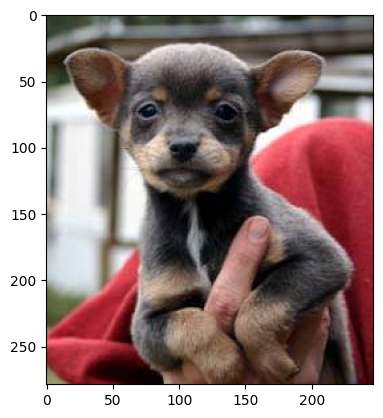

In [10]:
image=mpimg.imread('/content/train/dog.2108.jpg')
plt.imshow(image)

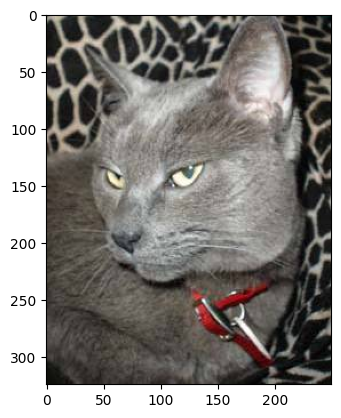

In [11]:
image=mpimg.imread('/content/train/cat.1586.jpg')
plt.imshow(image)

In [17]:
file_name=os.listdir('/content/train')
dog_count=0
cat_count=0
for i in file_name:
  name=i[:3]
  if name=='dog':
    dog_count+=1
  else:
    cat_count+=1
print(dog_count)
print(cat_count)



12500
12500


Resizing Images

In [36]:
#creating directory
os.mkdir('/content/resized2_images')

In [38]:
original_folder='/content/train'
resized2_folder='/content/resized2_images'
for i in range(1000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+'/'+filename
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  new_img_path=resized2_folder+'/'+filename
  img.save(new_img_path)

In [39]:
file_name=os.listdir('/content/resized2_images')
print(file_name)

['dog.2882.jpg', 'cat.9416.jpg', 'dog.8713.jpg', 'dog.6379.jpg', 'dog.11096.jpg', 'dog.6496.jpg', 'cat.10153.jpg', 'dog.8016.jpg', 'dog.2826.jpg', 'dog.5780.jpg', 'cat.2413.jpg', 'dog.8196.jpg', 'cat.2731.jpg', 'cat.4761.jpg', 'cat.12149.jpg', 'cat.1456.jpg', 'dog.12047.jpg', 'dog.6896.jpg', 'dog.6645.jpg', 'dog.1102.jpg', 'cat.11150.jpg', 'cat.6219.jpg', 'dog.342.jpg', 'cat.2079.jpg', 'dog.7083.jpg', 'cat.8061.jpg', 'cat.10514.jpg', 'cat.4770.jpg', 'dog.2647.jpg', 'cat.5002.jpg', 'cat.8127.jpg', 'dog.7971.jpg', 'cat.9010.jpg', 'cat.9788.jpg', 'dog.476.jpg', 'cat.7843.jpg', 'dog.9687.jpg', 'cat.6330.jpg', 'cat.3111.jpg', 'dog.10551.jpg', 'dog.135.jpg', 'dog.206.jpg', 'cat.6384.jpg', 'cat.4834.jpg', 'cat.167.jpg', 'dog.1035.jpg', 'dog.6908.jpg', 'dog.5623.jpg', 'dog.6349.jpg', 'dog.9786.jpg', 'cat.9940.jpg', 'cat.7744.jpg', 'dog.5750.jpg', 'cat.6269.jpg', 'dog.7038.jpg', 'dog.4400.jpg', 'dog.8702.jpg', 'cat.3638.jpg', 'cat.4162.jpg', 'dog.10836.jpg', 'dog.461.jpg', 'dog.2904.jpg', 'dog.

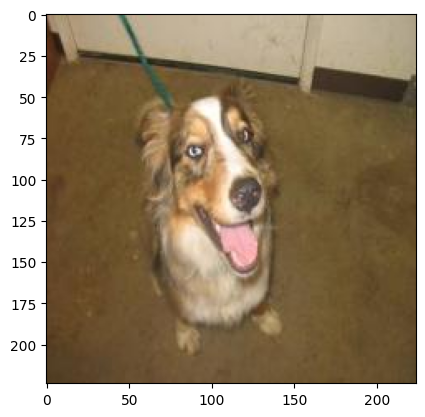

In [40]:
#checking wheather images resized or not
image=mpimg.imread('/content/resized2_images/dog.2882.jpg')
plt.imshow(image)

Labelling

cat-->0
dog-->1

In [41]:
filename=os.listdir('/content/resized2_images/')
labels=[]
for i in range(1000):
  f_name=filename[i]
  name=f_name[0:3]
  if name=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [42]:
print(filename[0:5])
print(len(filename))

['dog.2882.jpg', 'cat.9416.jpg', 'dog.8713.jpg', 'dog.6379.jpg', 'dog.11096.jpg']
1000


In [43]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 1, 1]
1000


In [44]:
#counting images of cat and dog in 1000 images
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)


[0 1]
[489 511]


Converting all the resized images to numpy array

In [45]:
import cv2
import glob

In [46]:
img_dir='/content/resized2_images/'
img_ext=['jpg','png']
files=[]
[files.extend(glob.glob(img_dir+'*.'+e))for e in img_ext]
dog_cat_img=np.asarray([cv2.imread(file) for file in files])

In [48]:
dog_cat_img2=dog_cat_img/255
print(dog_cat_img2)

[[[[0.41176471 0.49019608 0.61176471]
   [0.43921569 0.52156863 0.64313725]
   [0.45882353 0.54509804 0.65490196]
   ...
   [0.52156863 0.62352941 0.67058824]
   [0.51764706 0.61960784 0.66666667]
   [0.51764706 0.61960784 0.66666667]]

  [[0.36862745 0.44705882 0.56862745]
   [0.42745098 0.50980392 0.63137255]
   [0.4627451  0.54901961 0.65882353]
   ...
   [0.52941176 0.63137255 0.67843137]
   [0.5254902  0.62745098 0.6745098 ]
   [0.52156863 0.62352941 0.67058824]]

  [[0.30588235 0.38431373 0.50588235]
   [0.40392157 0.48627451 0.60784314]
   [0.47058824 0.55686275 0.66666667]
   ...
   [0.53333333 0.63529412 0.68235294]
   [0.52941176 0.63137255 0.67843137]
   [0.52941176 0.63137255 0.67843137]]

  ...

  [[0.12156863 0.22745098 0.30588235]
   [0.1254902  0.23137255 0.30980392]
   [0.12941176 0.23529412 0.31372549]
   ...
   [0.16470588 0.28235294 0.34901961]
   [0.16470588 0.28235294 0.34901961]
   [0.16862745 0.28627451 0.35294118]]

  [[0.1254902  0.23137255 0.30980392]
   [0.1

In [49]:
print(dog_cat_img2.shape)

(1000, 224, 224, 3)


In [50]:
X=dog_cat_img2
Y=np.asarray(labels)

Train test split

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [52]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1000, 224, 224, 3)
(800, 224, 224, 3)
(200, 224, 224, 3)
(800,)
(200,)


**Model Training**

In [53]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
best_accuracy = 0
best_kernel = ''

In [57]:
for kernel in kernels:

    model = svm.SVC(kernel=kernel)

    # Reshape X_train to 2D (samples x features)
    nsamples, nx, ny, nz = X_train.shape
    X_train_reshaped = X_train.reshape((nsamples,nx*ny*nz))

    model.fit(X_train_reshaped, Y_train)  # Fit the model with reshaped data

    # Reshape X_test similarly for prediction
    nsamples, nx, ny, nz = X_test.shape
    X_test_reshaped = X_test.reshape((nsamples,nx*ny*nz))

    Y_pred = model.predict(X_test_reshaped)

    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'Kernel: {kernel} - Accuracy: {accuracy:.2f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

print(f'\nBest Kernel: {best_kernel} with Accuracy: {best_accuracy:.2f}')

Kernel: linear - Accuracy: 0.53
Kernel: rbf - Accuracy: 0.61
Kernel: poly - Accuracy: 0.55
Kernel: sigmoid - Accuracy: 0.45

Best Kernel: rbf with Accuracy: 0.61
